### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

### 2. Load the Dataset

In [2]:
# Replace 'path_to_file' with the actual path to your CSV file
data = pd.read_csv('housing.csv')

### 3. Basic Data Exploration

In [3]:
# Display the first few rows of the dataframe
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**The housing dataset contains the following columns:**

- longitude and latitude: Geographical coordinates of the housing block.
- housing_median_age: Median age of the houses in the block.
-    total_rooms: Total number of rooms in the block.
-   total_bedrooms: Total number of bedrooms in the block.
-   population: Total number of people residing in the block.
-   households: Total number of households in the block.
-   median_income: Median income of households in the block.
-   median_house_value: Median house value for households in the block.
- ocean_proximity: Proximity of the housing block to the ocean.

In [4]:
# Summary statistics for numerical features
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 4. Checking for missing values

In [5]:
# Check for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- The dataset contains **20,640** instances with some missing values in **'total_bedrooms' (207 missing)**. This needs to be addressed, either by imputation or removal, before any model training.
- The median_house_value and median_income have wide ranges, indicating **significant diversity in housing affordability** across the region.

### 5. Addressing Missing Values in total_bedrooms

In [6]:
# Handling Missing Values - Impute missing 'total_bedrooms' with median of the column

imputer = SimpleImputer(strategy='median')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

The missing values in the 'total_bedrooms' column were **imputed with the median** of the column, ensuring that the dataset is complete for further analysis. This approach preserves the overall distribution of the data while ensuring the model has a complete dataset to work with, avoiding potential biases or errors that could arise from discarding rows with missing values.

### 6. Distribution of Categorical Data: ocean_proximity

The analysis of the ocean_proximity category gives insights into how housing blocks are distributed according to their proximity to the ocean.

In [7]:
# Understanding the distribution of 'ocean_proximity'
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### 7. Visualization 
### Distribution of Key Numerical Attributes

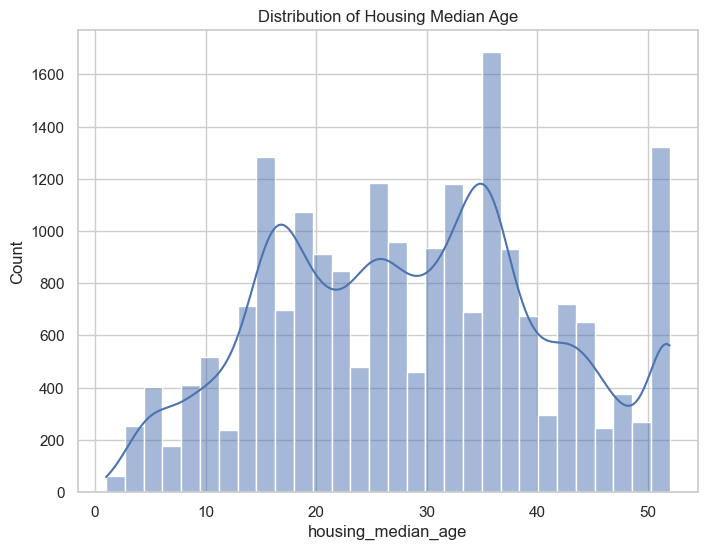

In [8]:
# Set visualization styles
sns.set(style="whitegrid")

# Distribution of 'housing_median_age'
plt.figure(figsize=(8, 6))
sns.histplot(data['housing_median_age'], bins=30, kde=True)
plt.title('Distribution of Housing Median Age')
plt.show()

The **housing_median_age** distribution suggests a significant number of houses are quite old, with a peak around the 50-year mark, indicating potentially historical or well-established neighborhoods.

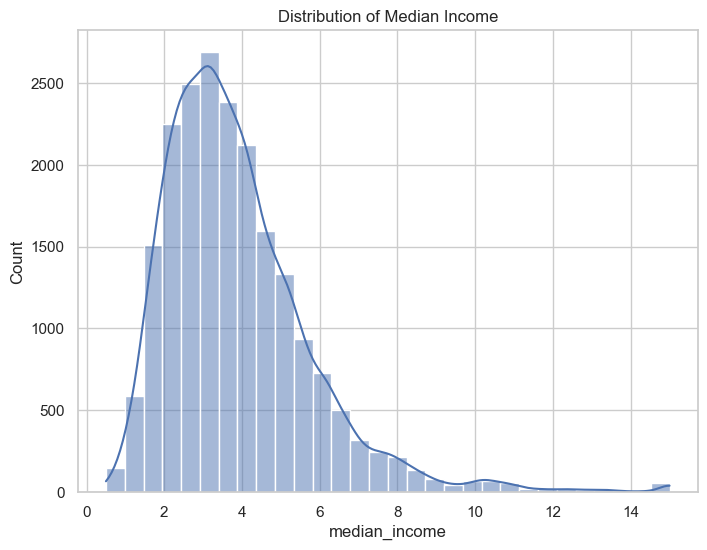

In [9]:
# Distribution of 'median_income'
plt.figure(figsize=(8, 6))
sns.histplot(data['median_income'], bins=30, kde=True)
plt.title('Distribution of Median Income')
plt.show()

Median_income shows a **right-skewed distribution**, implying that **lower incomes are more common**, with a few areas having significantly higher incomes.

### Plotting Median House Value Distribution

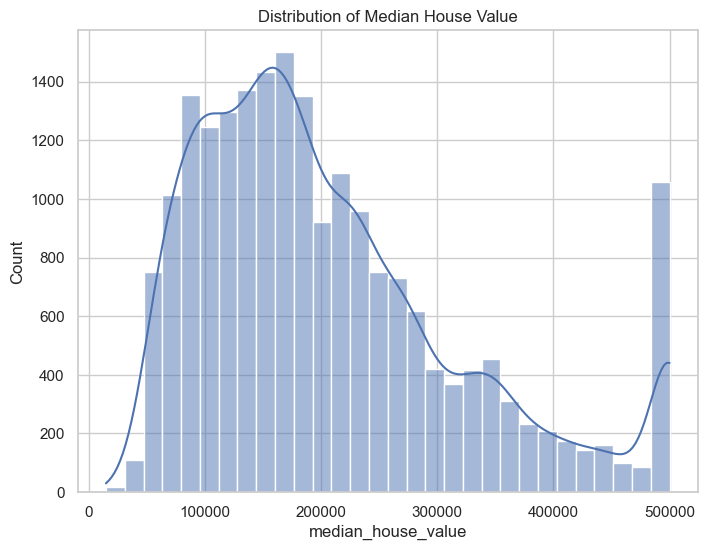

In [10]:
# Distribution of 'median_house_value'
plt.figure(figsize=(8, 6))
sns.histplot(data['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

**Median_house_value** also exhibits a **right-skewed distribution**, with a sharp cut-off at the dataset's maximum value, suggesting a capping of house value data at **$500,001**. This might need special consideration, as it may represent data censoring. The distribution of median house values shows a wide range, with a notable peak near the higher value end. This suggests a significant portion of properties are priced at the upper end of the market, potentially indicating a skewed market or caps on housing values.


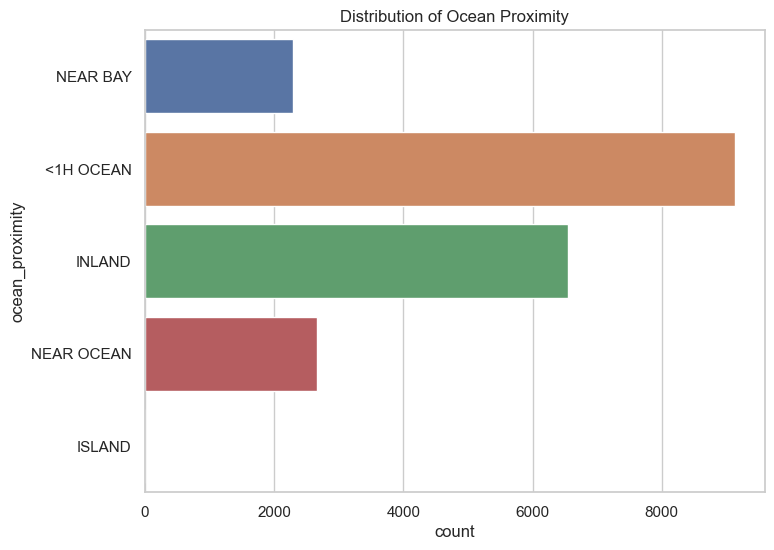

In [11]:
# Distribution of 'ocean_proximity'
plt.figure(figsize=(8, 6))
sns.countplot(y=data['ocean_proximity'])
plt.title('Distribution of Ocean Proximity')
plt.show()

The **ocean_proximity** feature shows that the majority of instances are less than 1 hour from the ocean, with a small number/none being on an island.

### 8. Median House Value vs. Median Income
The scatter plot **correlating median_income with median_house_value, colored by ocean_proximity**, is insightful for understanding regional disparities.

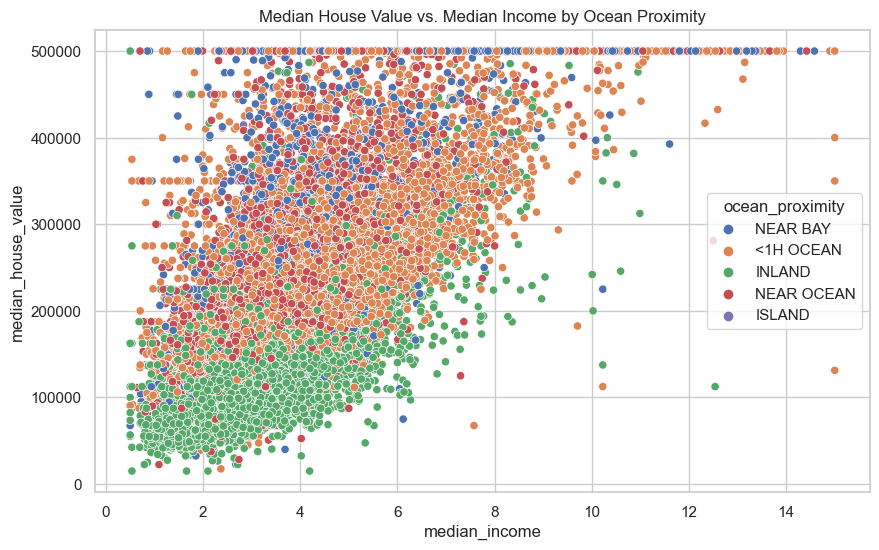

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', hue='ocean_proximity', data=data)
plt.title('Median House Value vs. Median Income by Ocean Proximity')
plt.show()


The **scatter plot of Median House Value vs. Median Income** highlights a **strong positive correlation** between these two variables, indicating that as median income increases, the median house value also tends to increase. This relationship is consistent across different proximities to the ocean.

### 9. Geographical Distribution of Housing

The geographical distribution of housing values plotted against longitude and latitude, sized by population and colored by median house value, offers a comprehensive view of the spatial relationships and demographic influences.

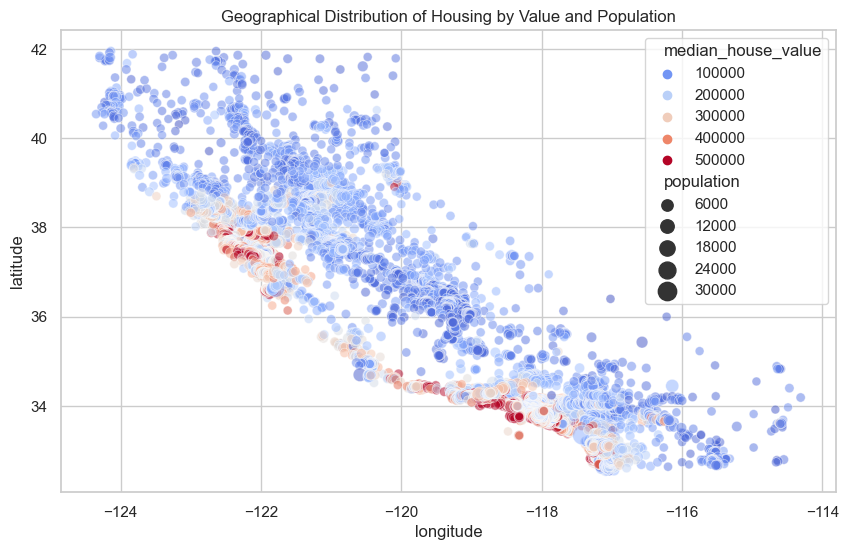

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='population',
                sizes=(40, 200), alpha=0.5, palette="coolwarm", data=data)
plt.title('Geographical Distribution of Housing by Value and Population')
plt.show()


The geographical distribution of housing by value and population size showcases that **higher-value houses are predominantly located near the coast**. The size of the points, representing population, indicates that some of these high-value areas are also densely populated.

The geographical plot reveals clusters of high-value properties along the coastline, suggesting proximity to the ocean has a significant impact on house values.

There's a notable variation in house values based on ocean_proximity, with coastal areas generally having higher house values. This is an important factor to consider in any housing price prediction model.

### 10. Correlation Analysis: 
We will generate a **heatmap** displaying the correlation matrix of housing features, offering insights into how different variables are related to each other.

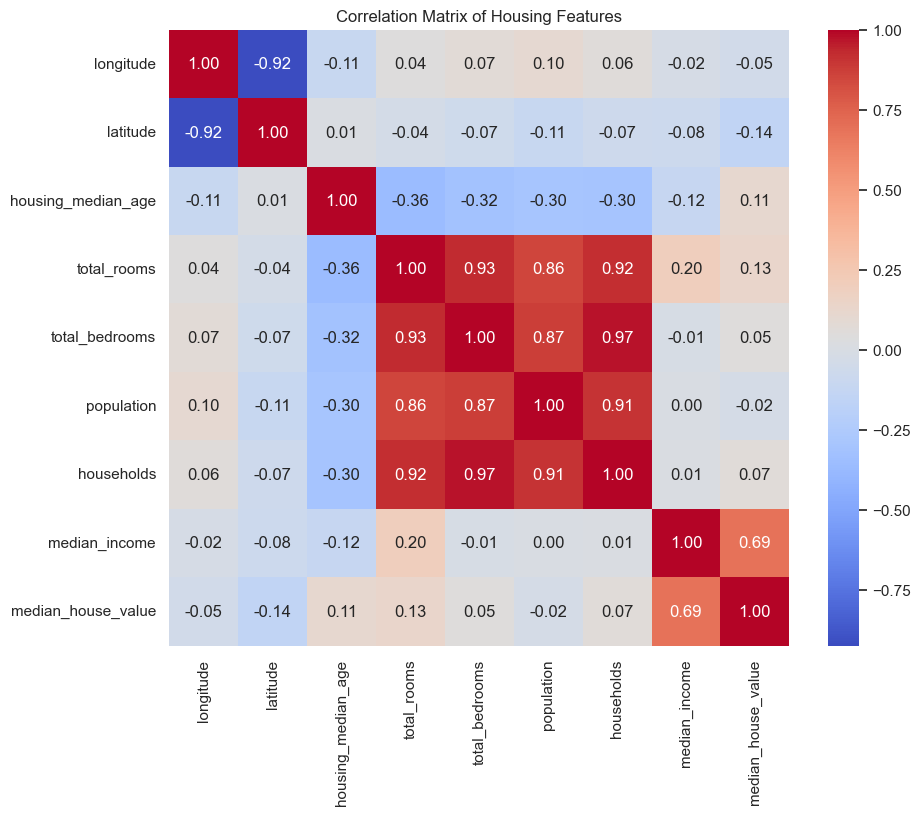

In [14]:
# Exclude non-numeric columns and compute the correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Housing Features')
plt.show()

**The correlation heatmap** provides a comprehensive overview of the relationships between numerical features in our housing dataset. Notably, we observe a strong positive correlation between **median_income and median_house_value**, suggesting that **higher income levels are associated with more expensive houses**. This aligns with intuitive expectations and highlights **income as a significant predictor of housing prices.**

Conversely, we see a **negative correlation between latitude and median_house_value**, indicating that **houses located further north tend to be less expensive**, which might reflect regional economic disparities or preferences for certain climates.

Additionally, the **total_rooms and households variables show a strong positive correlation**, which is logical since larger numbers of rooms would typically accommodate more households. However, this correlation also suggests a potential multicollinearity issue for predictive modeling, where these interrelated features could skew the importance of individual predictors.

The heatmap also indicates **relatively low correlations for housing_median_age with other features**, suggesting that the **age of housing does not significantly influence other characteristics of the housing blocks, including their value**. This insight could be crucial for developers or policy-makers focusing on new constructions or renovations.

### 11. Feature Engineering

In [15]:
# Feature Engineering - Create new features
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

**Creating New features to potentially uncover more insights:**

-    rooms_per_household: Total rooms per household.
 -   bedrooms_per_room: Bedroom ratio per room.
  -  population_per_household: Population per household.

### 12. Box plot illustrating the distribution of median_house_value across different ocean_proximity categories

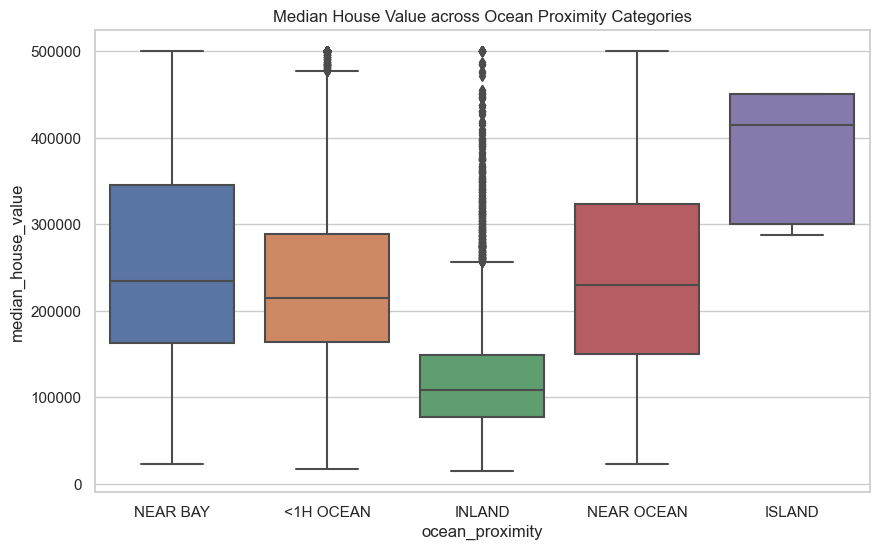

In [16]:
# Box plot for 'median_house_value' across 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Median House Value across Ocean Proximity Categories')
plt.show()

Here we created a box plot illustrating the distribution of median_house_value across different ocean_proximity categories, showing how proximity to the ocean might affect housing prices.

The box plot analysis of median_house_value across ocean_proximity categories underscores the significant impact of ocean proximity on housing prices. Properties within the **'<1H OCEAN' category generally command higher prices**, reflecting the **premium on ocean access**. Despite this, there's notable price variability within each proximity category, especially '<1H OCEAN', indicating a diverse range of housing values based on specific locations and possibly other amenities.

**'INLAND' properties, conversely, exhibit lower median values but with fewer outliers**, suggesting **more uniform and affordable pricing away from the coast**. The **'NEAR OCEAN' and 'NEAR BAY' categories, while still priced lower than '<1H OCEAN'**, offer a glimpse into the nuanced valuation of properties based on their exact coastal proximity and the amenities offered.

These findings highlight the complex interplay between **location and property values**, with **ocean proximity** being a key but not exclusive determinant. This analysis can inform potential buyers, investors, and policymakers about the **valuation trends** and help guide more nuanced decisions in the real estate market.

## CONCLUSION

In this analysis, we've taken a comprehensive look at the housing dataset, focusing on understanding **how various factors influence housing prices**. We started by **importing essential libraries and loading the dataset, followed by an exploratory data analysis that revealed key insights into the distribution of housing values, income levels, and the impact of ocean proximity on property prices**.

A significant step in our analysis was **addressing data quality issues**, where we successfully **handled missing values** in the **total_bedrooms column through median imputation**. This ensured our dataset was complete and robust for further analysis.

Through visualizations like **correlation heatmaps and box plots**, we identified **strong relationships between features** and delved into the nuanced effects of **geographical location on housing prices**. Our findings underscored the importance of median income and ocean proximity as determinants of housing value, providing **valuable insights for stakeholders in the real estate market**.

Concluding, our analysis not only clarified the **dynamics affecting housing prices but also prepared the dataset for potential predictive modeling**, laying a solid foundation for further research and decision-making in the housing sector.